In [1]:
import sklearn
import requests
import json
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication

## Authenticate

In [2]:
# Make sure to fill in your spotify client_secret information
cid = "049ade7215e54c63a2b628f3784dc407"
secret = "171ef0fc408745e88dd5b99b83291146"
redirect_uri = 'http://google.com/'
username = 'xxx'

In [3]:
#End points
sp_tracks = 'https://api.spotify.com/v1/me/tracks?limit=50'
sp_profile = 'https://api.spotify.com/v1/me'

In [4]:
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    
else:
    print("Can't get token for", username)

## Get User Tracks

In [5]:
def tp_req(next_url):
    try:
        resp = requests.get(url=next_url,
                        headers={'Authorization': 'Bearer ' + token})
        resp.raise_for_status()

    except requests.exceptions.HTTPError as err:
        print(err)

        
    response = resp.json()
    return response

In [6]:
class TSP:
    def __init__(self):
        self.all_song_info = {}
        
    def get_user_profile():
        response = tp_req(sp_profile)
        key_dict = {
            'uri': response['uri']
        } 
        return key_dict
    
    def get_user_tracks():
        def get_tracks(next_url):

            response = tp_req(next_url)

            track_limit = (response['limit'])-1

            for x in range(track_limit):

                try:
                    track_uri = response['items'][x]['track']['uri'].split(':')
                    track_name = response['items'][x]['track']['name']
                    tracks.append({'track_uri':track_uri[2],'track_name':track_name})

                except IndexError as error:
                    continue


            try:
                if (next_url is not None):
                    get_tracks(response['next'])
                   
                else:
                    print('hi')
            except:
                return

        tracks = []
        b = get_tracks(sp_tracks)
        return tracks
        
        

In [7]:
user = TSP

In [8]:
ident = user.get_user_profile()

In [9]:
ident

{'uri': 'spotify:user:124399179'}

In [10]:
import pandas as pd
tracks = user.get_user_tracks()
user_tracks = pd.DataFrame(tracks)

In [11]:
user_tracks

,track_uri,track_name
0,74UCMcpQmIsHh2JYR6Ew2z,Life During Wartime - Live
1,5Fwr2aZYUe4YF0sLa2BG7T,I Wanna Dance with Somebody - Live
2,4Wzdb6l8g7kYXhbseWQhiz,Desconocido Soy - Live
3,3swIOXn7HoqrEyX47f9CPO,Like Humans Do - Live
4,5xjL1A9x5ifZketAZolFPg,What a Day That Was - Live
...,...,...
6832,0PhOISlDStrQ2OA95Mt5di,Invincibility of Youth
6833,1QwMsUyMKjHXutqpfhLSQX,One Last Hurrah
6834,1EtnerdQGX4shiLF8YhzGY,Alkaline
6835,4M07IiNsHkwbq903FyDksl,Turquoise


## Compare User Tracks

In [12]:
import boto3
from s3 import get_file


In [13]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [14]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

In [15]:
db_tracks = data(get_file(s3,bucket,download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file = 'master_train_playlist.csv'))

In [16]:
dataset = user_tracks.merge(db_tracks,left_on ='track_uri',right_on='track_uri')

## User Liked Tracks Found in S3 Instance

In [17]:
dataset

,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,5Fwr2aZYUe4YF0sLa2BG7T,I Wanna Dance with Somebody - Live,David Byrne,i wanna dance with somebody - live,0.50700,0.704,0.707,0.6130,0.000003,7.0,1.0,0.7220,0.1260,4.0,124.940,-10.581,gettin outa bed gettin dress combin hair danci...
1,4Wzdb6l8g7kYXhbseWQhiz,Desconocido Soy - Live,David Byrne,desconocido soy - live,0.24600,0.683,0.710,0.5510,0.000000,7.0,1.0,0.7120,0.3570,4.0,131.540,-10.937,cambio siempre continuidad detrs nacin soledad...
2,3swIOXn7HoqrEyX47f9CPO,Like Humans Do - Live,David Byrne,like humans do - live,0.11500,0.658,0.739,0.5830,0.000005,0.0,1.0,0.6270,0.0527,4.0,107.009,-11.528,love woman child bear learn hurt learn human b...
3,5xjL1A9x5ifZketAZolFPg,What a Day That Was - Live,David Byrne,what a day that was - live,0.36900,0.558,0.753,0.5850,0.000014,7.0,1.0,0.9130,0.1540,4.0,135.150,-10.322,day dress nice doin startin startin lem story ...
4,10KN4huF35r6rTF7hZX3qc,The Great Intoxication - Live,David Byrne,the great intoxication - live,0.44800,0.395,0.578,0.2480,0.000384,2.0,1.0,0.7090,0.1960,4.0,95.256,-14.796,disco techno hip hop bop play record bedroom r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0dEIca2nhcxDUV8C5QkPYb,Give Life Back to Music,Daft Punk,give life back to music,0.00286,0.788,0.616,0.6960,0.549000,9.0,0.0,0.0952,0.0337,4.0,119.037,-10.671,music tonight music music life life music musi...
498,5CMjjywI0eZMixPeqNd75R,Lose Yourself to Dance (feat. Pharrell Williams),Daft Punk,lose yourself to dance (feat. pharrell williams),0.08390,0.832,0.659,0.6740,0.001140,10.0,0.0,0.0753,0.0570,4.0,100.163,-7.828,chance break life speed shirt wipe sweat sweat...
499,7oaEjLP2dTJLJsITbAxTOz,Touch (feat. Paul Williams),Daft Punk,touch (feat. paul williams),0.47700,0.290,0.412,0.1200,0.083900,6.0,0.0,0.0790,0.0458,4.0,90.539,-12.659,touch remember touch picture touch painter min...
500,2KHRENHQzTIQ001nlP9Gdc,Contact,Daft Punk,contact,0.00282,0.400,0.756,0.0924,0.753000,11.0,0.0,0.0695,0.0492,4.0,123.828,-8.423,hey bob jack talk particle nearby bright objec...


## LDA Topic Modeling

In [18]:
class Model:
    
        
    def LDA(n_components):
        

        
        return LDA  
    
    
    def get_playlists(lda_model):
        
    
        # Create Document - Topic Matrix

        

        # column names
        topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]


        # index names
        docnames = [dataset['track_uri'].iloc[i] for i in range(len(dataset['lyrics']))]



        # Make the pandas dataframe
        df_document_topic = pd.DataFrame(np.array(lda_output), columns=topicnames, index=docnames)

        # Get dominant topic for each document
        dominant_topic = np.argmax(df_document_topic.values, axis=1)


        df_document_topic['dominant_topic'] = dominant_topic
        
        
        return df_document_topic


    

    def get_playlist_elements(df_document_topic):
        df_tsp = []


        for col in df_document_topic.columns:

            if col != 'dominant_topic':

                topic_length= df_document_topic[df_document_topic[col]>=.60].nlargest(n=20, columns=col)

                chosen_topic = topic_length[col]

                if len(chosen_topic)>=10:

                    for track_uri in chosen_topic.index:


                        df_tsp.append({'playlist':col,'track_uri':track_uri})



        topic_groupings = pd.DataFrame(df_tsp)     

        playlists = topic_groupings.merge(dataset,on='track_uri',how='left')
        
        playlist_agg = playlists.groupby('playlist').mean()
        
        
        return [playlists,playlist_agg]
        
        


    
 


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from yellowbrick.text import FreqDistVisualizer
import numpy as np


LDA = LatentDirichletAllocation(n_components=30, learning_method="batch",
                                max_iter=15, random_state=10,doc_topic_prior=.02)

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=.005, max_df=.5,     # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=500)             # max number of uniq words



data_vectorized = vectorizer.fit_transform(dataset['lyrics'].values.astype('U'))
        
        
LDA.fit(data_vectorized)


lda_output = LDA.transform(data_vectorized)


df_playlists = Model.get_playlists(LDA)

df_send = Model.get_playlist_elements(df_playlists)

df_base = df_send[0]

df_predict = df_send[1].reset_index()
df_predict_class = df_send[1].reset_index()

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Warning Vulgar Language Could Appear

In [20]:
n_words = 10

topic_words = []

def get_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic{x}: ".format(x=topic_idx)
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        
        topic_words.append({'words':message})
        
        print(message)
    print()
    
    
print("\nTopics in LDA model:")
cv_feature_names = vectorizer.get_feature_names()
#print_top_words(LDA, cv_feature_names, n_words)

topic_list = get_top_words(LDA, cv_feature_names, n_words)


Topics in LDA model:
Topic0: start blow wrong wheel lady terrible month bout air baby
Topic1: hard nigga play fuck niggas bitch shit win gold lose
Topic2: real leave girl daddy love baby easy wan gun yeah
Topic3: hurt pretty spend money life carry bad gas tonight time
Topic4: hey knock piece girl fall fuck wood liquor money mother
Topic5: dance lose ooh dancin money worth friday yeah floor chorus
Topic6: fucking heaven hope tomorrow night water roll wave black break
Topic7: love baby hot lot bump rock girl chorus feel beat
Topic8: power hand mask super feel burn live break boy wear
Topic9: music tonight lose catch life watch win live rock hand
Topic10: wait night change sun write stand sunset letter smile jet
Topic11: wake yeah kiss day march news eat heart save play
Topic12: talk yea reason love build hear bitch pull sleep yeah
Topic13: nerve disappear ruin divide lead highway leave lay heart hide
Topic14: day eye feel time sleep sun hope morning leave song
Topic15: time alright frie

##  Mean Audio Features for Each Topic Themed Playlist

In [21]:
df_topics = pd.DataFrame(topic_words)
df_topics[['playlist','words']] = df_topics.words.str.split(':',expand=True)

In [22]:
df_predict_class

,playlist,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness
0,Topic0,0.272339,0.455200,0.618400,0.394300,0.006715,5.400000,0.700000,0.293220,0.109780,3.900000,122.184700,-9.127800
1,Topic1,0.153788,0.517500,0.785700,0.518880,0.036413,4.700000,0.600000,0.205460,0.106750,4.000000,123.853600,-6.707600
2,Topic11,0.194023,0.519818,0.667991,0.502091,0.056115,4.727273,0.454545,0.212191,0.091418,3.909091,133.069455,-8.424636
3,Topic13,0.092163,0.562636,0.727909,0.565727,0.124455,5.000000,0.545455,0.213855,0.113482,4.000000,126.592364,-7.297455
4,Topic14,0.355113,0.492933,0.644533,0.442533,0.065403,4.066667,0.666667,0.190127,0.078100,4.000000,114.292400,-8.667267
5,Topic15,0.244225,0.373583,0.710333,0.360000,0.219372,6.250000,0.666667,0.157600,0.046442,4.000000,119.650750,-7.190417
6,Topic2,0.235063,0.588615,0.579385,0.528892,0.156432,6.384615,0.615385,0.324869,0.092177,3.923077,120.978615,-9.780154
7,Topic20,0.178852,0.557200,0.629000,0.617300,0.202703,5.200000,0.600000,0.382300,0.084410,4.000000,133.228100,-10.535500
8,Topic24,0.315575,0.613471,0.506682,0.572529,0.118988,5.058824,0.647059,0.185735,0.053853,3.764706,127.421882,-10.096647
9,Topic25,0.170792,0.500300,0.650700,0.629000,0.082852,5.600000,0.900000,0.255350,0.073180,4.000000,132.582900,-9.953800


## Binary Classification

In [23]:
train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',
                           rename_file = 'master_train_playlist.csv'))

test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'test.csv'))

In [24]:

df_predict_class = df_predict_class.reindex(sorted(df_predict_class.columns), axis=1)

df_train = train_data.reindex(sorted(train_data.columns), axis=1)


df_test = test_data.reindex(sorted(test_data.columns), axis=1)




In [25]:

df_predict_class = df_predict_class.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])


df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

In [26]:
def model(df_train,df_test,df_tsp):
        #Structure
        from sklearn.pipeline import Pipeline
        from sklearn.model_selection import train_test_split as tts
        from sklearn.model_selection import cross_val_score as cvs
    
        from sklearn.linear_model import LogisticRegression
        
        from sklearn.preprocessing import StandardScaler
        
        #Reports
        from yellowbrick.classifier import confusion_matrix
        
        #Metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
    
        X = df_train[[col for col in df_train.columns if col != 'target']]

        y = df_train['target']

        X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)
        
        models = [
        #Standard Scaler,QuantileTransformer random_state=0
        
        Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
        ])
        ]
        a = []
        for model in models:
            model.fit(X_train, y_train)
            #y_pred = model.predict(df_agg_ssp)
            _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
            y_pred = model.predict(df_predict_class)
            #print({'Model':model[1],'Transformer':model[0],'Model Score':cvs(model,X_test,y_test)[3],
              #'F1 Score':f1_score(X_test,y_test),'Precision Score':precision_score(X_test,y_test),
              #'Recall Score':recall_score(X_test,y_test)
                     #})
            
        return y_pred

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


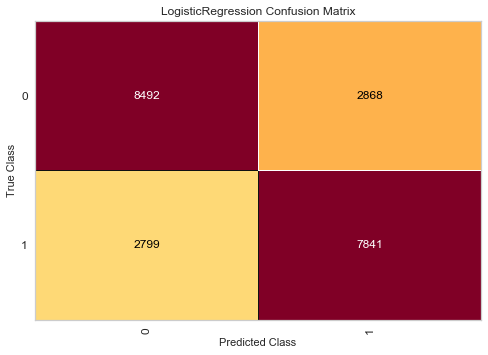

In [27]:
results = model(df_train,df_test,df_predict_class)

In [45]:
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
import random
chosen_playlist = random.choice([index for index,a in enumerate(results) if a == 1])

In [47]:
playlist_value = df_predict.iloc[chosen_playlist]


chosen_topic = playlist_value['playlist']

#chosen_topic = df_predict[df_predict['playlist']==playlist_value['playlist']]

In [48]:
tsp_deliverable = df_base[df_base['playlist']==chosen_topic]

In [49]:
tsp = tsp_deliverable.sort_values(by='valence',ascending=False)
tsp = tsp.reset_index()

## Playlist Energy Valence Curve

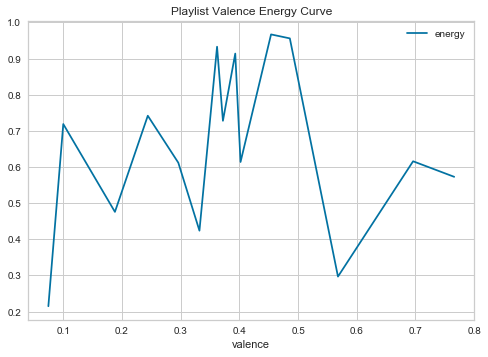

In [50]:
tsp.plot.line(x='valence',y='energy',title='Playlist Valence Energy Curve')


In [51]:
import requests
import json
import pandas as pd
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication


cid = '049ade7215e54c63a2b628f3784dc407'
secret = '171ef0fc408745e88dd5b99b83291146'
redirect_uri = 'http://google.com/'
username = 'name'



#Authentication

scope = 'playlist-modify-private'
token_playlist = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_playlist:
    
    sp_playlist = spotipy.Spotify(auth=token_playlist)

else:
    
    print("Can't get token for", username)
    
#Authentication

scope = 'user-read-private'

token_user = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_user:
    sp_user = spotipy.Spotify(auth=token_user)
else:
    print("Can't get token for", username)
    


Enter the URL you were redirected to: https://www.google.com/?code=AQDcBT057mMqmpk9kvP1UUue7UwVjrzKw5GtttBzn2YROPW0vHcAxECs3Ng6-CneOTHpvA4bivNKBDsgHD3Xh8vDSm8btYQwlhVb0HGEEuH9qPhIBVQ8fepKz3MpmHoaZ1rlqqenixE3PL0VIbbBonbRqqg1lXDn0QMCGKC3fm6pgVTwpnNqfedS-Fv1U6o
Enter the URL you were redirected to: https://www.google.com/?code=AQDkE4Ua-D2d8Rld94aoNL7iJL6z-Wo6l7dl96ssQBxKJeM6kQehh2JYxYz4i7bot8DxQAF4_DF9oHN7MfAllyB-vPfbXI_Mtp-2qpEzGQYDUHCB3tPscxiBCj4UognJ_zAYkzBo1cl0HVMkdJFfWnkZ9nj7DuI5V2DPYKmwo58KMLp9A6SMsRs


In [35]:
def get_user_id(url):
    try:
        resp = requests.get(url,headers={'Authorization': 'Bearer ' + token_user},
                           )
        
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as err:
        
        print(err)
        
    
    response = resp.json()
    userid = response['id']
    
    return userid

user_id = get_user_id('https://api.spotify.com/v1/me')

In [36]:
identification = user_id
identification

'124399179'

In [37]:
tsp

,index,playlist,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,5,Topic0,1MjykK5Ik4oaFSYjWlxP3i,Natural Mystic - Exodus 40 Mix,Bob Marley & The Wailers,natural mystic - exodus 40 mix,0.16400,0.805,0.422,0.930,0.000000,7.0,1.0,0.1380,0.2600,4.0,131.262,-12.316,natural mystic blow air listen carefully hear ...
1,7,Topic0,5WFR2ja56IaLMH8iwvy3yW,Lady D'Arbanville - Live From the United State...,Yusuf / Cat Stevens,lady d'arbanville - live from the united state...,0.87900,0.538,0.621,0.640,0.000000,4.0,0.0,0.6880,0.0489,4.0,93.100,-13.302,cold moan life start crumble crazy live start ...
2,6,Topic0,33X9miK4Xz7pNeVrc9RITG,Ready to Start,Arcade Fire,ready to start,0.11700,0.277,0.934,0.519,0.023800,9.0,1.0,0.0692,0.0382,4.0,188.802,-4.672,businessman drink blood kid art school guess f...
3,3,Topic0,2eSlBeOIKaT5LvPplw9aPN,Month of May,Arcade Fire,month of may,0.03690,0.461,0.994,0.513,0.023600,1.0,0.0,0.3960,0.1150,4.0,167.996,-5.487,gon record month month month gon record month ...
4,8,Topic0,7ulGjpWKbda4c7SUgQUMbo,All the Same,Deerhunter,all the same,0.00801,0.529,0.816,0.491,0.000052,11.0,1.0,0.1090,0.0317,4.0,112.856,-5.742,expect comfort save air leave stay matter cold...
5,2,Topic0,1BplQYEJ9HWNR99iN1xtyN,Carrion,Deerhunter,carrion,0.00567,0.345,0.579,0.223,0.019200,0.0,1.0,0.1000,0.0327,4.0,134.622,-6.387,carry carry carry stay strong stay strong set ...
6,0,Topic0,1GWk2MHsycvbyOFaWFiOMk,Sorry - Homecoming Live,Beyoncé,sorry - homecoming live,0.00981,0.418,0.729,0.193,0.000000,7.0,1.0,0.9660,0.4810,4.0,129.254,-11.479,nigga nah roll pick head club bout lady sip us...
7,9,Topic0,3UqOMMaH8ArnMvN4Vd6KiM,Dying Inside,The Cranberries,dying inside,0.00700,0.543,0.403,0.192,0.000003,0.0,1.0,0.1380,0.0283,4.0,117.966,-9.959,terrible terrible terrible terrible win play g...
8,1,Topic0,3T9Yut47mtH2r00TVyT0bi,Big Wheels,Electric Light Orchestra,big wheels,0.63000,0.306,0.329,0.141,0.000474,5.0,0.0,0.1380,0.0272,4.0,61.870,-11.763,time understand answer lie soul coin fall whee...
9,4,Topic0,2FNPJWVdGxYhWaotd6rULS,Sandcastles,Beyoncé,sandcastles,0.86600,0.330,0.357,0.101,0.000018,10.0,1.0,0.1900,0.0348,3.0,84.119,-10.171,verse build sandcastle wash walk promise stay ...


In [38]:
words = df_topics[df_topics['playlist']==tsp['playlist'][0]]

theme = ' '.join(words['words'].values).capitalize()

In [39]:
playlist = sp_playlist.user_playlist_create(identification,f'Adam_TSP_Ideal: {theme}', public=False, description="Ideal TSP")


sp_playlist.user_playlist_add_tracks(identification,playlist['id'],tsp['track_uri'], position=None)

{'snapshot_id': 'MyxmMmZkZmQ4MGU0N2UxMjcyNzY2ODZmY2U3NjgxNzg5OTdlZmNiMWZl'}